# 特徴量記述子

* 記述(description): 局所領域の内容を認識に役立つ情報に変換する過程
* 記述子(descriptor): その記述された情報

記述子は一般的にベクトル$v \in \Re^D$として表される
* 局所記述子(local descriptor): 局所領域の記述子

認識に役立つ情報を得るために、局所領域の形やテクスチャ情報などを抽出する


## 画素記述子
* 画素記述子(raw pixel descriptor): 最も単純な局所記述子、局所領域の情報をそのままベクトル化したもの

局所領域中に$N$個の画素$\{I(x_n)\}^N_{n=1}$があるとすると、局所領域内のすべての画素値を結合したベクトル$v$が画素記述子となる

$v = (I(x_1), I(x_2),\ldots,I(x_N))^\top$

RGBで表現された画像なら画素はRGBの３次元ベクトル$I(x_n) \in \Re^3$となる。このように画素が多次元ベクトルで表現されている場合でも、次のようにそれぞれの画素の値を結合して画素記述子を構成する:
$v = (I(x_1)^\top, I(x_2)^\top,\ldots,I(x_N)^\top)^\top$

## 局所バイナリパターン
* LBP(Local binary pattern, 局所バイナリパターン): 局所領域のテクスチャ情報を表現する記述子

LBPでは中心が外その周辺が外の輝度の差を計算し、その符号によって0,1の2値パターンを割り当てる。
中心がその周りの$N$個の画素を利用すれば$N$ビットのパターンとなる。 LBPは計算コストが低く、輝度の変動に頑健

参考: https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

1. グレースケールに画像を変換
2. 中心画素と周辺画素を選択する。周辺画素は中心画素をとりまく$r$個の画素とする。以下では$3\times 3$の局所領域を考える($r=8$)。
3. 中心画素と周辺画素の輝度の差を計算する。そして、周辺画素の輝度が中心がその輝度以上であれば1, そうでなければ0とする。
![LBP-1](Figs/LBP-1.png "LBP-1")
4. 中心画素のLBPの値を次のようにして求める：中心画素の右上の画素から時計回りに$w^i (u=0,\ldots,7)$の重みを割り当てて総和を求める。
この例では図に示すように$23$となる
![LBP-2](Figs/LBP-2.png "LBP-2")
5. こうして求めた値をLBPの2次元配列の中心画素に対応する位置に記憶。このLBP計算をすべての画素に対して行う。
![LBP-3](Figs/LBP-3.png "LBP-3")

計算式から明らかなように、元画像の画素すべてに対して同じ値（オフセット）を加えた画像からも同じLBP配列が得られる。ゆえに輝度の変化に頑健といえる。

以下はLBP 2D配列の例: (図の出典:https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/)
![Figs/LBP-Fig](Figs/LBP-Fig.png "LBP-Figure")

またヒストグラムを求めて局所領域の記述子として使うことも多い。
![Figs/LBP-HBistogram](Figs/LBP-Histo.png "LBP-Histogram")

In [4]:
%matplotlib inline
from skimage import feature
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
class LocalBinaryPatterns:
   def __init__(self, numPoints, radius):
      # store the number of points and radius
      self.numPoints = numPoints
      self.radius = radius
 
   def describe(self, image, eps=1e-7):
      # compute the Local Binary Pattern representation
      # of the image, and then use the LBP representation
      # to build the histogram of patterns
      lbp = feature.local_binary_pattern(image, self.numPoints,
         self.radius, method="uniform")
      (hist, _) = np.histogram(lbp.ravel(),
         bins=np.arange(0, self.numPoints + 3),
         range=(0, self.numPoints + 2))
 
      # normalize the histogram
      hist = hist.astype("float")
      hist /= (hist.sum() + eps)
 
      # return the histogram of Local Binary Patterns
      return hist

desc = LocalBinaryPatterns(24, 8)
for x in ["Data/bikes.png", "Data/building.png", "Data/graft.png"]:
  image = cv2.imread(x)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = desc.describe(gray)
  print(x,"\t", hist)

Data/bikes.png 	 [0.03438143 0.03349571 0.01205571 0.00719286 0.00510429 0.00458714
 0.00450143 0.00475143 0.00542857 0.00714286 0.01001143 0.01630857
 0.02723286 0.01876143 0.01161857 0.00813714 0.00596    0.00507714
 0.00424429 0.00421143 0.0046     0.00698857 0.01226714 0.03384286
 0.03752143 0.67457571]
Data/building.png 	 [0.04119531 0.03573828 0.00901953 0.00397852 0.00303516 0.00218359
 0.00224219 0.00209961 0.00256445 0.00247461 0.00330469 0.00360742
 0.00716602 0.00535547 0.00355664 0.00355859 0.00261328 0.00323047
 0.00285937 0.00310742 0.00361133 0.00541992 0.00993945 0.03645312
 0.04541016 0.75627539]
Data/graft.png 	 [0.03254297 0.03070312 0.01663086 0.01251367 0.01002539 0.00852539
 0.00827539 0.00866211 0.00972266 0.01205273 0.01675977 0.0266582
 0.0420293  0.02528711 0.01283984 0.00908594 0.005875   0.00549219
 0.00424414 0.00430469 0.00473047 0.00614648 0.01083594 0.0339082
 0.03709961 0.60504883]


## 局所輝度勾配

輝度勾配はエッジを検出する効果があるので、局所輝度勾配ヒストグラムは形の情報を表現しているといえる（LBP 2D配列の図参照）。
輝度勾配の方向が量子化されていることから微小な回転に対して頑健、さらに移動に対する若干の不変性を有する。

### SIFT記述子

SIFT（Scale Invariant Feature Transform, SIFT）記述子:
1. キーポイントの候補に対して行う(キーポイントの候補はDoGを用いてスケールと空間にわたって画像の局所的極値を探索（ここらへんは https://www.slideshare.net/hironobufujiyoshi/miru2013sift の7〜18枚目参照)、(コントラストによる)閾値よりも小さな極値とエッジを削除して絞り込む(https://www.slideshare.net/hironobufujiyoshi/miru2013sift の19〜27枚目参照）。(図の出典：https://news.mynavi.jp/article/computer_vision-29/）｝
<IMG src="Figs/SIFT-1.png" alt="SIFTのスケール不変性" width=50% />
2. 向きの算出<BR>
    キーポイントが検出されたガウスピラミッドのレベル（スケール）で、キーポイントを中心とした局所領域内の各画素を強度$m(x,y)$と傾き角度$\theta(x,y)$を計算。ここでキーポイントを中心としてガウス分布により重み付し(キーポイントから遠い画素ほど影響を小さくすることが狙い)、空間($x,y$の2次元）と方向($\theta$の1次元）の計3つの変数として、輝度勾配強度$m$の分布を(全方向を36方向に離散化し)ヒストグラムで表す。このヒストグラムからキーポイントの「代表的な向き」を決定する(https://www.slideshare.net/hironobufujiyoshi/miru2013sift の28〜32枚め参照)。
(図の出典: https://www.slideshare.net/hironobufujiyoshi/miru2013sift ）
<IMG src="Figs/SIFT-4.png" alt="向きの算出" width=50% />    <IMG src="SIFT-3.png" alt="向きの算出2" width=50% />    
3. 特徴量記述子の計算<BR>
   キーポイントの周辺16x16個の領域を取り出し、キーポイントの「代表的な向き」を基準として回転させる。そして 4x4 のサイズに分け、16個の小ブロックを作る。それぞれの小ブロックに対し、それぞれ8個のビンをもつ勾配ヒストグラムを作る。これにより全部で 128個の値が得られることになる。それをベクトルで表現し、特徴量記述子とする。
   (図の出典: https://www.slideshare.net/hironobufujiyoshi/miru2013sift ）
<IMG src="Figs/SIFT-5.png" alt="特徴量" width=50% />   

得られた特徴量記述子に対し、L2正規化を施す、主成分分析により次元削減する(PCA-SIFT)などの方法がある。

手順１によりスケール不変性、手順２によりノイズにたいする頑健性、手順３により回転不変性と照明変化に対する頑健性が得られる。今でも主要な方法の一つであるが、特許が設定されているため使用には課金される。

ベクトルとして表現されているため、例えば２つの画像における対応点の探索において、キーポイント間の「距離」によって類似性判断ができる。

No. of keypoints = 512


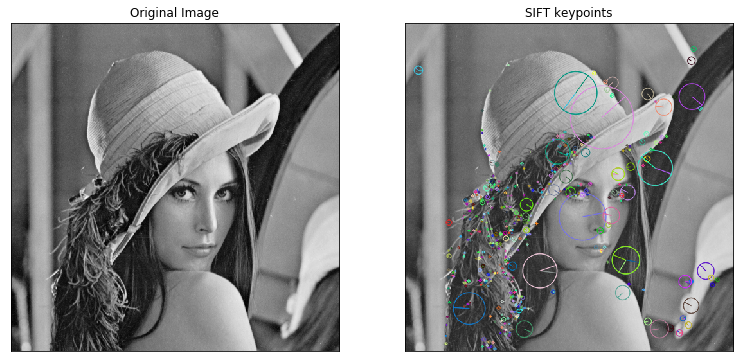

In [110]:
%matplotlib inline
from skimage import feature
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Figs/lenna.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create(512) # キーポイントの数を512個に制限
kp = sift.detect(gray, None)
print("No. of keypoints = %d"%len(kp))

img2=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 円と向きを図示

plt.figure(figsize=(20,14))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(gray,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img2,cmap = 'gray')
plt.title('SIFT keypoints'), plt.xticks([]), plt.yticks([])

plt.show()

### HOG記述子

参考: https://qiita.com/mikaji/items/3e3f85e93d894b4645f7

HOG(Histogram of Oriented Gradients)記述子: 局所領域 (セル) の輝度の勾配方向をヒストグラム化したもの

勾配情報をもとにしているため、異なるサイズの画像を対象とする際も同じサイズにリサイズすることで比較可能になる

HOSG特徴量の計算手順:
1. 対象画像を適当なサイズにリサイズし、グレイスケールで読み込む
2. 各画素に対し輝度勾配の強度と方向を計算する
3. $N_p \times N_q$(例えば$N_p=N_q=5$)個の画素からなるセル(局所領域)ごとに輝度勾配ヒストグラムを計算する。HOG記述子では、方向の符号を考えずに$0 \sim 180$度を20度ずつに量子化(つまり$N_\theta=9$)したビンを考える。つまり1つのセルは9次元ベクトルであらわされる。
4. $N_c\times N_c$(例えば$N_c=3$)個のセルをひとつのブロックとして、ブロックごとに正規化し、特徴量を求める。正規化は以下で表される(${\bf v}_i^{(k)}$はブロック${\cal B}_k$に含まれるセル$i$の輝度勾配ヒストグラム, $\epsilon$は小さな正の実数):<BR>
    $\displaystyle \hat{\bf v}_i^{(k)} = \frac{{\bf v}_i^{(k)}}{\sqrt{\sum_{j \in {\cal B}_k}\| {\bf v}_j^{(k)} \|^2+\epsilon^2}}$
5. ブロックの各セルを表現するベクトルをすべて結合し、ブロックをひとつのベクトルとして表現する。したがってこのベクトルの次元は$N_\theta \times N_c \times N_c$次元となる。${\bf v}^{(k)} = ( \hat{\bf v}_1^{(k)\top}, \ldots, \hat{\bf v}_{N_c\times N_c}^{(k)\top} )^\top$

In [76]:
# OpenCVのHOGDescriptorは人検出用らしいので、skimageを用いるーvisualiseオプションを用いる
from skimage.feature import hog
help(hog)

Help on function hog in module skimage.feature._hog:

hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L1', visualise=False, transform_sqrt=False, feature_vector=True, normalise=None)
    Extract Histogram of Oriented Gradients (HOG) for a given image.
    
    Compute a Histogram of Oriented Gradients (HOG) by
    
        1. (optional) global image normalization
        2. computing the gradient image in x and y
        3. computing gradient histograms
        4. normalizing across blocks
        5. flattening into a feature vector
    
    Parameters
    ----------
    image : (M, N) ndarray
        Input image (greyscale).
    orientations : int, optional
        Number of orientation bins.
    pixels_per_cell : 2-tuple (int, int), optional
        Size (in pixels) of a cell.
    cells_per_block : 2-tuple (int, int), optional
        Number of cells in each block.
    block_norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}, optional
        Block no

(72900,) [0.00991979 0.01252778 0.00125214 ... 0.00163937 0.0018165  0.00757412]


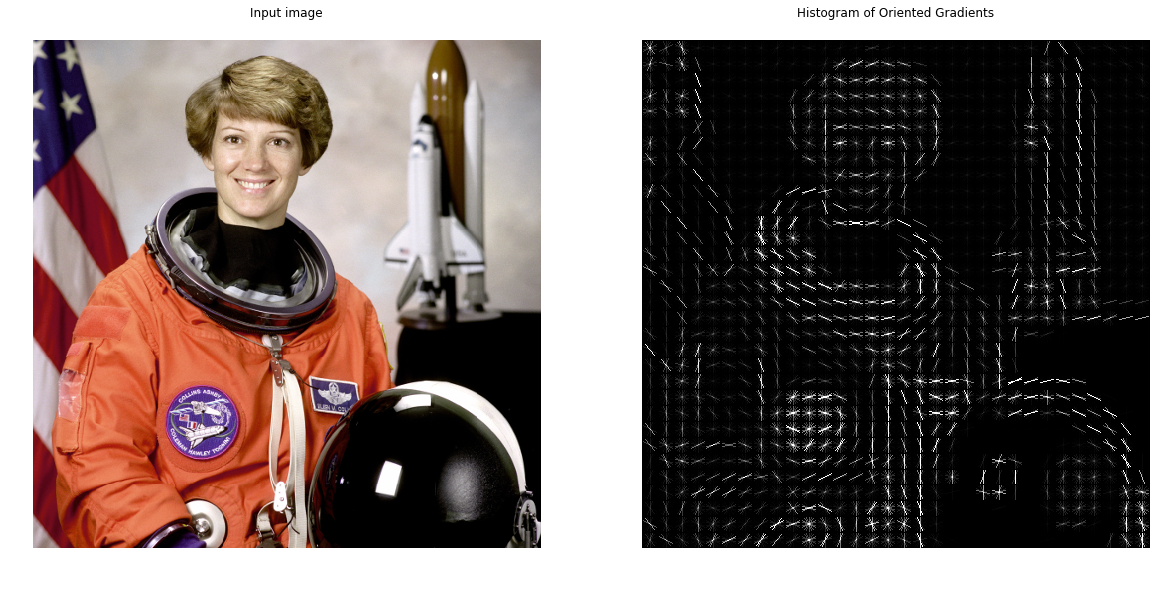

In [88]:
# 引用元: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html
%matplotlib inline
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import numpy as np
import cv2

ast= data.astronaut()

image=cv2.cvtColor(ast,cv2.COLOR_RGB2GRAY)

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(3, 3), block_norm='L2-Hys', visualise=True)
print(fd.shape,fd)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(ast, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### SURF記述子

参考: http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_feature2d/py_surf_intro/py_surf_intro.html

SURFはSIFTの高速化バージョン(SURF: Speeded Up Robust Features)。これも特許があり、使用するには特許料を払う必要がある。

SIFTではスケール空間を見つけ出すためにLoG(ガウシアン・ラプラシアン)をDoG(ガウシアンの差分)で近似していた。SURFではそれをもう少し進めて、LoGをボックス・フィルタで近似する。下の図はこの近似を示している。この方法の大きな利点は、ボックス・フィルタによる畳込みが積分画像の助けにより簡単に計算できるということである。しかもいろいろなスケールでの計算が並列で行える。SURFはまた、スケールと位置の両方に対しヘッセ行列の行列式を用いている。

<IMG src="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/surf_boxfilter.jpg" alt="ボックスフィルタ" />

向きの計算に対して、SURFはキーポイントを中心としたサイズ$6\times s$($s$はスケール)の周辺領域に対する水平方向と垂直方向のHaarウェーブレット応答を用いる。適切なガウス重みも適用される。そして、下図に示すような空間で表現する。60度の角度を持つウィンドゥをずらしながら、そのウィンドゥの中のすべての応答値の合計を計算して、最大の向きを決定する。ここで面白いことに、ウェーブレット応答はどのスケールに対しても積分画像を用いて簡単に計算できる。 多くの応用において回転不変は要求されず、したがって向きの計算が必要とされない、これにより高速化が図れる。SURFが与えるこのような機能をアップライトSURF, もしくは U-SURFF と呼ぶ。SURFは高速性を改善し、頑健さも $\pm 15^{\circ}$まで改善している。OpenCVはフラグuprightの値によってSURFもU-SURFもサポートしている。もしもuprightフラグの値が 0であれば、向きの計算が行われ、1であれば向きを計算せず、より高速に計算が行われる。
<IMG src="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/surf_orientation.jpg" alt="向きの決定" />

特徴量記述子に対しても, SURFはキーポイント周りの水平方向と垂直方向のHaarウェーブレット応答を用いる(またもや積分画像により計算が簡単になっている)。キーポイントを中心としたサイズ$20s \times 20s$($s$はスケール)の周辺領域を対象とする。これを$4\times 4$に分割する。分割領域それぞれに対し、水平方向と垂直方向のウェーブレット応答を取り出し、次のようなベクトルを作る:$v_i=( \sum{d_x}, \sum{d_y}, \sum{|d_x|}, \sum{|d_y|})^\top$. これをL2正規化する(${\bf v}=\bf{v}/\|{\bf v}\|_2$ことにより合計(16個の分割領域$\times$4次元=）64次元のベクトルができ、これをSURFの特徴記述子の表現とする。次元を削減すれば特徴記述子の計算とマッチングを速く行えるが、特徴の弁別性能が悪くなる。

特徴の弁別性能をあげるために、SURFの特徴記述子には128次元の拡張版がある。$d_x$ と $|d_x|$の合計は $d_y < 0$ と $d_y \geq 0$という条件別に計算される。同様に、 $d_y$ と $|d_y|$の合計の計算も$d_x$の正負によって別に行われ、それにより特徴量の数が2倍になっている。そうであっても、計算コストはあまり増えない。OpenCV ではcv2.SURF()関数のオプションextendedフラグの値が 0 か 1 によって 64次元と 128次元を切り替えられるようにしている(デフォルトは 64次元である)。

分析によれば、SIFTと比べスピードは3倍速く、性能はほぼ変わらない。SURFはぼかしや回転に強いが、視点変化や明るさの変化には弱い。

No. of keypoints = 210


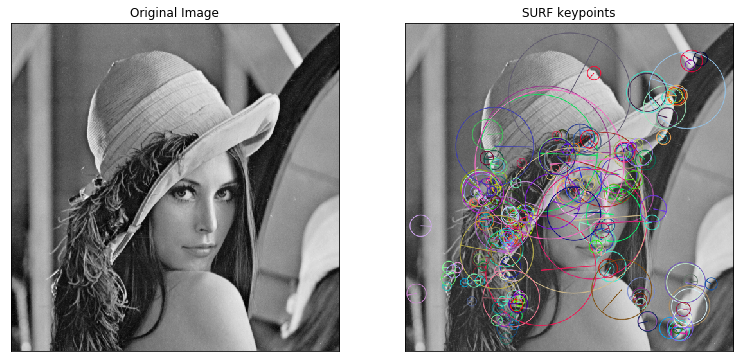

[[ 4.4705189e-04 -2.1403887e-04  1.1357234e-03 ... -4.7320062e-03
   2.7438409e-03  5.6132730e-03]
 [-1.8737075e-03 -3.6063204e-03  3.1625926e-03 ...  8.4259280e-04
   1.8969192e-03  9.0515136e-04]
 [ 3.1605063e-03  1.9050771e-04  6.1479560e-03 ...  1.3305149e-03
   3.7017844e-03  3.7579227e-03]
 ...
 [-2.6655014e-05 -1.4373121e-03  1.3558998e-03 ...  5.9177759e-03
   9.3385186e-03  7.4904091e-03]
 [ 4.4291434e-03  2.8078028e-03  1.0279587e-02 ...  1.3708213e-03
   4.3806415e-03  3.0066320e-03]
 [-2.7025031e-04 -1.5187300e-03  3.5176679e-04 ...  4.1661327e-04
   2.8044374e-03  4.7085006e-04]]


In [119]:
%matplotlib inline
from skimage import feature
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Figs/lenna.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

surf = cv2.xfeatures2d.SURF_create(2000) # 閾値(ここでは2000とした)によりキーポイントの数を調整
kp, des = surf.detectAndCompute(img,None)
print("No. of keypoints = %d"%len(kp))

img2=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 円と向きを図示

plt.figure(figsize=(20,14))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(gray,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img2,cmap = 'gray')
plt.title('SURF keypoints'), plt.xticks([]), plt.yticks([])

plt.show()
print(des)

### バイナリ局所記述子

バイナリ局所記述子(binary local descriptor): 特徴抽出時間を短縮し、特徴同士の類似度計算が高速に行なえ、省メモリ化を狙った記述子。ベクトルの各要素が０か１の二値(binary)で表現されたもの。

ハミング距離(Hamming distance)を用いて、バイナリ局所記述子同士の類似度計算を高速に行える。ハミング距離とは、対応する桁にある値の異なるビットの個数を数えるもの。例えば,$1011101$と$1001001$のハミング距離は２となる。


### BRIEF(Binary Robust Independent Elementary Features)

BRIEF記述子：局所領域から直接的に$M$ビットのバイナリ局所記述子を抽出する。
1. 入力画像をガウシアンフィルタにより平滑化する
2. $N_p \times N_q$の局所領域$\Re$中の適切な$M$組の２点${\bf x}_i$と${\bf y}_i$ ($i = 1,2,\ldots,M$)を選択し、輝度値の比較を行う。もしも $I({\bf x}_i) < I({\bf y}_i)$であれば$r({\bf x}_i,{\bf y}_i)=1$，そうでなければ$r({\bf x}_i,{\bf y}_i)=0$とする。
3. これにより$M$次元のビットコード列を得る:
${\bf v}_\Re = \sum^M_{i=1} 2^{i-1}r({\bf x}_i,{\bf y}_i)$

$M$は128, 256、512の値を取る。BRIEFでは局所領域から平均0、標準偏差$M/5$のガウス分布に従い、${\bf x}_i$と${\bf y}_i$をあらかじめ独立に生成させる手法をもちいている。

注意: BRIEFは特徴記述子であってキーポイントを検出する機能はない。こで、SIFTやSURFなどのような特徴点検出器が必要である。原論文では CenSurE という高速の検出器の使用を勧めており、BRIEFはSURFの特徴点に対するよりもCenSurEの特徴点に対する方が少しだけ性能がよい。

No. of keypoints = 180


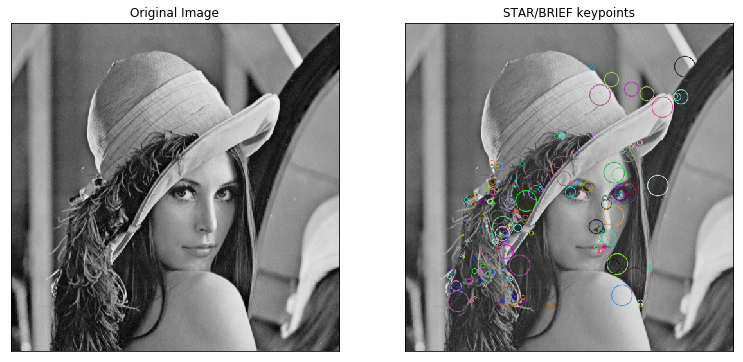

[[183 185 216 ... 215 157  40]
 [136 207   0 ...  63 174 165]
 [ 24  66 111 ... 219 200 239]
 ...
 [ 31  67 185 ...  71  28  58]
 [207 170 144 ... 160 242 210]
 [244 249  11 ... 211 219  43]]


In [113]:
%matplotlib inline
from skimage import feature
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Figs/lenna.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# STAR検出器を作る(CenSurE特徴検出器)
star = cv2.xfeatures2d.StarDetector_create()

# BRIEF抽出器を作る
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# STARでキーポイントを計算
kp = star.detect(gray,None)

# BRIEFで特徴記述子を計算
kp, des = brief.compute(gray, kp)

print("No. of keypoints = %d"%len(kp))
img2=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 円と向きを図示

plt.figure(figsize=(20,14))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(gray,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img2,cmap = 'gray')
plt.title('STAR/BRIEF keypoints'), plt.xticks([]), plt.yticks([])

plt.show()
print(des)

### rBRIEF記述子(rotated BRIEF descriptor)
ｒBRIEF記述子では、パッチのサンプリング点をパッチの支配的な方向の分だけ回転させ、BRIEF記述子と同様に２点の輝度の差からバイナリベクトルを求める。また2点の組の選択を大量のパッチを用いた学習で決定する。

### BRISK記述子

参考: http://www.vision.cs.chubu.ac.jp/~yuhi/CVLecture/PDF/CVLecture111213.pdf

BRISK (Binary Robust Invariant Scalable Keypoints): BRIEFにスケール不変性と回転不変性を導入
* スケール不変性を導入したFASTを用いたキーポイント検出を行う。入力画像を多段階に縮小したピラミッド画像を作成し、それぞれに対してFASTを適用、それらから特徴点らしさのレスポンス値を算出し、閾値以上かつ$x,y$方向及びスケール方向の3次元空間で極大となる点をキーポイントとして抽出する。
* 回転不変性は，SIFTと同様に向きを推定することで対応する
* 図に示すように，パッチに配置された4つの同心円上において，等間隔にサンプリングされた60箇所の画素値を用いる．
BRIEFはランダムサンプリングに基づいているため，ビット数×2回分の画素値のアクセスが必要だが，BRISKでは規則的に並んだ60点の画素値のみが分かれば良い．なお，各サンプリング点における輝度は，中心からの距離に比例する分散を持つガウスフィルタにより平滑化することでノイズ耐性を得る（図では赤で分散を表す）

![BRISKのサンプリング](Figs/BRISK-1.png "BRISKのサンプリング")


60点のサンプリング点について，点間の距離が$\delta_{max}$以下になるペアの集合を$S$, 点間の距離が$\delta_{min}$以上になるペアの集合を$L$と定義する($\delta_{max}, \delta_{min}$の値はあらかじめスケールに応じて定められた閾値).

正しくオリエンテーションを推定するためには，パッチ内の大局的な勾配方向を捉えることが重要である．そこで，集合$L$に所属するペアの平均勾配ベクトル${\bf g}$を求め，${\bf g}$の角度を「支配的な方向」とする

特徴量記述には距離が近いペアの集合$S$を用いることで局所的な画像特徴を捉える。$S$の要素数は512個と定められているため、最終的に得られる特徴量は512ビットとなる。

No. of keypoints = 1413


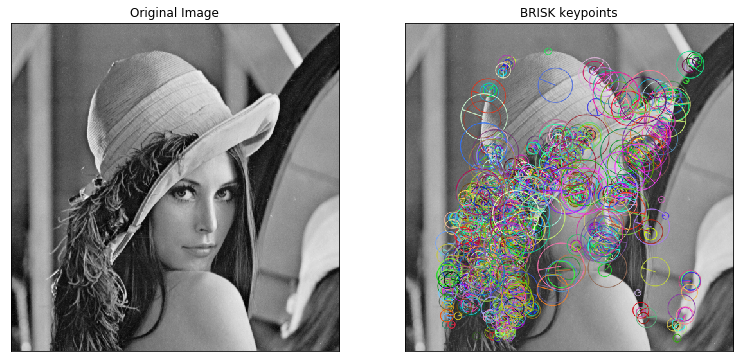

[[176 255 255 ... 141 128   1]
 [244 255 239 ... 140 137 207]
 [176  89 219 ...  63  25  50]
 ...
 [180   8 209 ... 207 159  31]
 [252 255 239 ... 205 205 223]
 [  0   2 128 ...   0   0 128]]


In [118]:
%matplotlib inline
from skimage import feature
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Figs/lenna.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# BRISK 特徴検出
detector = cv2.BRISK_create()

# 特徴記述子を計算
kp, des = detector.detectAndCompute(img,None)

print("No. of keypoints = %d"%len(kp))
img2=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # 円と向きを図示

plt.figure(figsize=(20,14))
# 原画像とカーネルサイズを変えたフィルタをかけた画像を並べて見比べる
plt.subplot(131),plt.imshow(gray,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img2,cmap = 'gray')
plt.title('BRISK keypoints'), plt.xticks([]), plt.yticks([])

plt.show()
print(des)

### 高次局所自己相関特徴

(省略)


### GIST記述子

論文: http://cvcl.mit.edu/Papers/IJCV01-Oliva-Torralba.pdf

参考: http://lear.inrialpes.fr/pubs/2009/DJSAS09/gist_evaluation.pdf

GIST記述子は代表的な大域的画像特徴量（シーン記述など、画像全体から求まる特徴ベクトル）の一つ。コピー画像検出タスクなどでは、bag-of-words (BoW)に匹敵する性能が得られる(参考論文参照)。

* ガボールフィルタ: 2次元ガボールフィルタは、人間の一次視野の単純型細胞をモデル化したもん、ガウシアンエンベロープ($w({\bf x})$、${\bf x}_0$はそのピーク位置、$K$はその強度のスケール)と正弦波搬送波($s({\bf x})$は正弦波、$P$は正弦波搬送波の位相、${\bf u}_0$はその空間周波数)を用いたフィルタ: 
$\begin{array}{lll} G_b({\bf x}) &=& K \exp(jP)w({\bf A}({\bf x}-{\bf x}_0))s({\bf x})\\
               w({\bf x}) &=& \exp(-\pi {\bf x}^\top {\bf x}) \\
               s({\bf x}) &=& \exp(j2\pi{\bf u}_0^\top{\bf x}) \end{array}$
               
${\bf A}$は$2\times 2$の行列で${\bf A}={\bf DV} \hspace{5em}$
$\displaystyle {\bf D}=\begin{pmatrix} a & 0\\ 0 & b  \end{pmatrix}, 
    {\bf V}= \begin{pmatrix} \cos\theta & \sin\theta \\\ -\sin\theta & cos\theta \end{pmatrix}$

ガボールフィルタの理解については: http://zellij.hatenablog.com/entry/20131003/p1    http://fussy.web.fc2.com/algo/image2_gabor.htm   http://mplab.ucsd.edu/tutorials/gabor.pdf

GIST記述子の求め方:
1. $N_s$種類のスケールと$N_o$種類の方向の合計$N_s \times N_o$種類のガボールフィルタを画像領域に適用する。つまり各画素は$N_s \times N_o$次元のベクトルで表現される
2. 画像領域を$N_b \times N_b$のブロックに分割する。各ブロックにおいてガボールフィルタを適用後のベクトルの平均を計算する
3. 各ブロックの平均ベクトルを結合することで対象領域を表現する記述子とする。これは$N_s \times N_o \times N_b^2$次元のベクトル

Pythonで使いたい人は https://github.com/tuttieee/lear-gist-python

In [ ]:
# https://en.wikipedia.org/wiki/Gabor_filter
import numpy as np

def gabor_fn(sigma, theta, Lambda, psi, gamma):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3 # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation 
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

応用例: https://arxiv.org/pdf/1310.0316.pdf     http://ilab.usc.edu/siagian/Research/Gist/Gist.html   https://github.com/nrupatunga/GIST-global-Image-Descripor  https://www.google.co.jp/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&ved=0ahUKEwjz-ZKBg-3ZAhVFGZQKHSIoAWMQFgg8MAQ&url=https%3A%2F%2Fipsj.ixsq.nii.ac.jp%2Fej%2Findex.php%3Faction%3Dpages_view_main%26active_action%3Drepository_action_common_download%26item_id%3D77681%26item_no%3D1%26attribute_id%3D1%26file_no%3D1%26page_id%3D13%26block_id%3D8&usg=AOvVaw1O0mUV9oX3Yj1hMokTPyLL

### CNNを用いた局所記述子

省略